In [ ]:
#Создадим окружение для работы
!python3 -m venv env
!source env/bin/activate
!pip install -r requirements.txt

In [177]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

In [178]:
#https://www.tensorflow.org/datasets/catalog/mnist
# Скачиваем требуемый датасет, он уже разделен на тестовый и тренировочный набор данных

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [188]:
#Создадим новый набор данных с рандомизацией и разбивкой, 0.2 для теста, 0.8 для обучения
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(24576, 28, 28)
(6144, 28, 28)
(24576,)
(6144,)


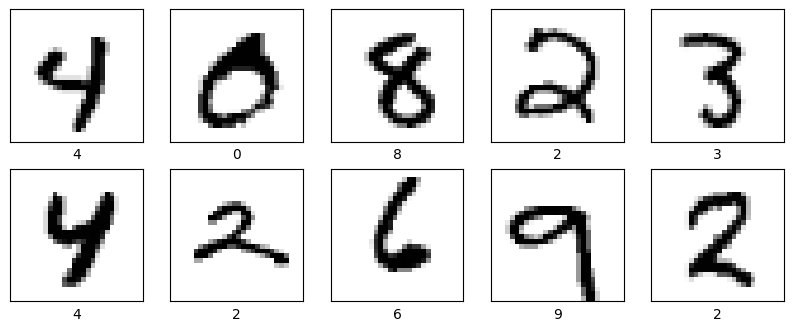

In [189]:
#визуализируем то, с чем работаем
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()



In [198]:
#Создаем модель, используем relu функцию активации и softmax на последнем слое, которая хорошо подходит, для задач класификации,
#поскольку цифр 10 то и классов 10.
#известна информация о изображении Image(shape=(28, 28, 1), dtype=uint8), поэтому в первом слое 28,28
#так же добавим dropout c коэфициентом 0.2 чтобы избежать переобучения модели

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])


In [199]:
# Для сравнения используем несколько вариантов оптимизаторов, Adamax, Adadelta , sgd, adam
# а так же несколько вариантов функции потерь,
# таких как sparse categorical crossentropy, categorical hinge и Poisson loss function
# В каждой из моделей ходим максимизировать точность, поэтому этот параметр будет везде одинаков
# Немного математики касаемо функции потерь, http://www.100byte.ru/python/loss/loss.html
# Кратко о оптимизаторах https://towardsdatascience.com/7-tips-to-choose-the-best-optimizer-47bb9c1219e


optimizers = ['Adamax', 'Adadelta', 'Sgd','Adam']
f_loses = ['sparse_categorical_crossentropy', 'categorical_hinge', 'poisson']
id_model = {}

for optimizer in optimizers:
  for f_los in f_loses:
    model_id = f'Optimizer {optimizer} loss function {f_los}'
    model.compile(optimizer=optimizer, loss=f_los, metrics=['accuracy'])
    fited_model = model.fit(X_train, y_train, epochs=10, batch_size=128)
    predictions = model.predict(X_val)

    # Сохраним модели для работы в будующем
    id_model[model_id] = fited_model

Epoch 1/10
192/192 [==============================] - 1s 4ms/step - loss: 18.2340 - accuracy: 0.5188
Epoch 2/10
192/192 [==============================] - 1s 4ms/step - loss: 2.8041 - accuracy: 0.5019
Epoch 3/10
192/192 [==============================] - 1s 4ms/step - loss: 1.9137 - accuracy: 0.4943
Epoch 4/10
192/192 [==============================] - 1s 4ms/step - loss: 1.6091 - accuracy: 0.5291
Epoch 5/10
192/192 [==============================] - 1s 4ms/step - loss: 1.4441 - accuracy: 0.5700
Epoch 6/10
192/192 [==============================] - 1s 4ms/step - loss: 1.3138 - accuracy: 0.6206
Epoch 7/10
192/192 [==============================] - 1s 4ms/step - loss: 1.2123 - accuracy: 0.6462
Epoch 8/10
192/192 [==============================] - 1s 3ms/step - loss: 1.1117 - accuracy: 0.6786
Epoch 9/10
192/192 [==============================] - 1s 4ms/step - loss: 1.0233 - accuracy: 0.6981
Epoch 10/10
192/192 [==============================] - 0s 1ms/step
Epoch 1/10
192/192 [============

Optimizer Adamax loss function sparse_categorical_crossentropy: accuracy: 0.71436, loss: 0.95816
Optimizer Adamax loss function categorical_hinge: accuracy: 0.37113, loss: 0.10984
Optimizer Adamax loss function poisson: accuracy: 0.09855, loss: 10.35703
Optimizer Adadelta loss function sparse_categorical_crossentropy: accuracy: 0.11174, loss: 2.30187
Optimizer Adadelta loss function categorical_hinge: accuracy: 0.10156, loss: 0.10957
Optimizer Adadelta loss function poisson: accuracy: 0.09998, loss: 10.35605
Optimizer Sgd loss function sparse_categorical_crossentropy: accuracy: 0.20894, loss: 2.02507
Optimizer Sgd loss function categorical_hinge: accuracy: 0.2026, loss: 0.11028
Optimizer Sgd loss function poisson: accuracy: 0.10478, loss: 10.35407
Optimizer Adam loss function sparse_categorical_crossentropy: accuracy: 0.20854, loss: 2.04071
Optimizer Adam loss function categorical_hinge: accuracy: 0.16565, loss: 0.10958
Optimizer Adam loss function poisson: accuracy: 0.09993, loss: 10.

Text(0, 0.5, 'Точность')

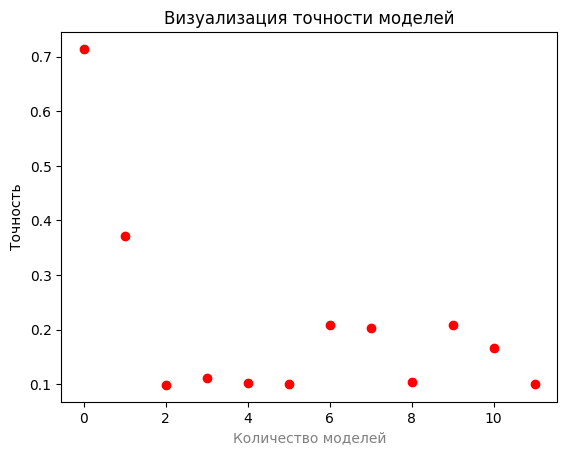

In [208]:
acc_vals = []
acc_labels = []
loss_vals = []

best_model_id = ''
max_acc = 0


for model_id, f_model in id_model.items():
  acc = round(f_model.history['accuracy'][-1], 5)
  if acc > max_acc:
    max_acc = acc
    best_model_id = model_id


  acc_vals.append(acc)
  acc_labels.append(model_id)

  loss = round(f_model.history['loss'][-1],5)
  loss_vals.append(loss)
  print(f'{model_id}: accuracy: {acc}, loss: {loss}')


plt.plot(acc_vals, 'ro')
plt.title('Визуализация точности моделей')
plt.xlabel('Количество моделей', color='gray')
plt.ylabel("Точность")



In [214]:
#Выведем модель с наибольшей точностью, а так же ее параметры
print(f'best model is: {best_model_id}')
print(f'Model accuracy {max_acc}')
print("Model los: ", id_model[best_model_id].history['loss'][-1])

best model is: Optimizer Adamax loss function sparse_categorical_crossentropy
Model accuracy0.71436
Model los:  0.9581592679023743


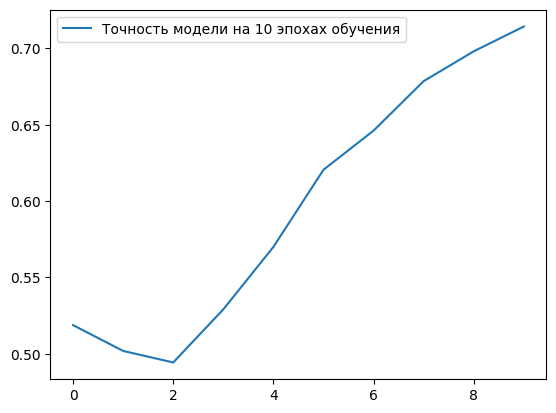

In [217]:
from matplotlib import pyplot as plt
best_model = id_model[best_model_id]

plt.plot(range(len(best_model.epoch)), best_model.history['accuracy'], label='Точность модели на 10 эпохах обучения')
plt.legend()
plt.show()

In [86]:
#Сохранием удачную модель в файл для дальнейшего использования
import pickle

with open("model.pickle", "wb") as file:
    pickle.dump(model, file)

In [83]:
#создадим функцию, которая принимает путь к файлу, и использует модель для классификации
import pickle

with open("model.pickle", "rb") as file:
    model = pickle.load(file)
    file.close()

def predict_image(file):
  try:
    with open(file, "rb") as f:
      image_data = f.read()
      f.close()
      return model.predict(image_data)
  except FileNotFoundError:
    print("ERROR! FILE NOT FOUD")

